In [1]:
import pywt
import astropy.io.fits as pyfits
from skimage import color, data, restoration

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# hdulist_B = pyfits.open('../reduced_images/cropped/B.fits')
img_B = pyfits.getdata('../reduced_images/cropped/B.fits', 0)

# hdulist_V = pyfits.open('../reduced_images/cropped/V.fits')
img_V = pyfits.getdata('../reduced_images/cropped/V.fits', 0)

# hdulist_Ha = pyfits.open('../reduced_images/cropped/Ha.fits')
img_Ha = pyfits.getdata('../reduced_images/cropped/Ha.fits', 0)

## Deconvolution

In [19]:
psf = np.ones((5, 5)) / 5

decon_B = restoration.richardson_lucy(img_B, psf, 30)
# decon_V = restoration.richardson_lucy(img_V, psf, 5)
# decon_Ha = restoration.richardson_lucy(img_Ha, psf, 5)

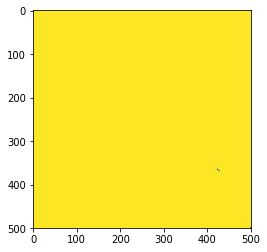

In [20]:
plt.imshow(decon_B)
# plt.imshow(decon_V)
# plt.imshow(decon_Ha)

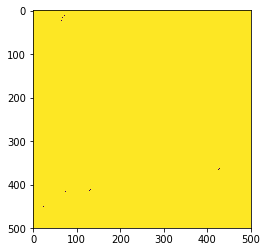

In [22]:
plt.imshow(restoration.denoise_wavelet(img_Ha))

In [26]:
FT_img_Ha = np.fft.fft(img_Ha)

/home/damien/.local/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


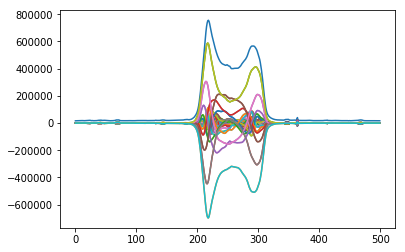

In [29]:
plt.plot(FT_img_Ha)

## Decomposition

In [34]:
wavelet = pywt.Wavelet('sym15')
levels  = int(np.floor(np.log2(img_B.shape[0])))

In [39]:
def denoise(data, wavelet, noiseSigma):
    
    levels = int(np.floor(np.log2(data.shape[0])))
    wav_coeffs = pywt.wavedec2(data,wavelet,level=levels)
    threshold = noiseSigma * np.sqrt(2*np.log2(data.size))
    NWC = map(lambda x: pywt.thresholding.soft(x, threshold), wav_coeffs)
    
    return pywt.waverec2(NWC, wavelet)

In [40]:
denoise_B = denoise(img_B, wavelet, levels)
denoise_V = denoise(img_V, wavelet, levels)
denoise_Ha = denoise(img_Ha, wavelet, levels)

ValueError: Expected sequence of coefficient arrays.

In [ ]:
plt.imshow(wav_coeff_B)
plt.imshow(wav_coeff_V)
plt.imshow(wav_coeff_Ha)

## Feature Contours

In [4]:
import aplpy

In [5]:
import matplotlib

In [6]:
from astropy import wcs

In [7]:
# header = pyfits.getheader('../reduced_images/cropped/Ha.fits')
w = wcs.WCS('../reduced_images/cropped/V_wcs.fits')

print(w.wcs)

       flag: 137
      naxis: 2
      crpix: 0x3908a40
               1184.4       1613.9    
         pc: 0x3361cd0
    pc[0][]:  -0.00017430  -2.6023e-06
    pc[1][]:   2.7324e-06  -0.00017386
      cdelt: 0x3309fb0
               1.0000       1.0000    
      crval: 0x38c4940
               283.36       32.924    
      cunit: 0x3842dc0
             "deg"
             "deg"
      ctype: 0x2b6b6d0
             "RA---TAN-SIP"
             "DEC--TAN-SIP"
    lonpole: 180.000000
    latpole: 32.923731
    restfrq: 0.000000
    restwav: 0.000000
        npv: 0
     npvmax: 0
         pv: 0x0
        nps: 0
     npsmax: 0
         ps: 0x0
         cd: 0x2468f10
    cd[0][]:  -0.00017430  -2.6023e-06
    cd[1][]:   2.7324e-06  -0.00017386
      crota: 0x372c6d0
               0.0000       0.0000    
     altlin: 2
     velref: 0
        alt: ' '
     colnum: 0
      colax: 0x36f7560
                 0      0
    wcsname: UNDEFINED
      cname: 0x2b648f0
             UNDEFINED
             

INFO: Auto-setting vmin to  2.586e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.542e+04 [aplpy.core]


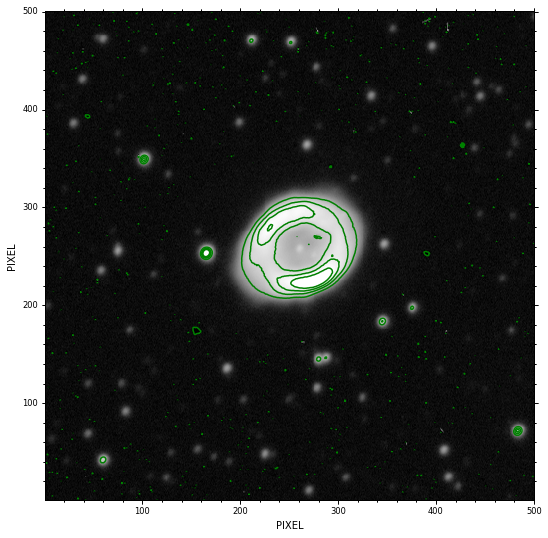

In [20]:
# create a canvas where data will be plotted
# hdu_Ha = pyfits.open('../calor_alto_data/NGC6720/dubU_0528.fits')
hdu_V = pyfits.open('../reduced_images/cropped/V.fits')
gc=aplpy.FITSFigure('../reduced_images/cropped/V.fits')#, hdu=hdu_Ha[0].header)
gc.header = hdu_V[0].header
# gc.header['NAXIS0'] = hdu_Ha[0].header['NAXIS']

gc.show_grayscale(stretch='arcsinh')
# display the image using a colourscale stretch
########gc.show_colorscale(cmap=matplotlib.cm.gray_r,vmin=0.0,vmax=0.005)

# overlay contours onto colorscale image
gc.show_contour(colors='green', levels=5)#, levels=[-0.0005,0.0005,0.001,0.002,0.004,0.008])

# add a label to the bottom left of the image
#######gc.add_label(0.2,0.05,'NGC6720',relative='axes')

# # determine RA and DEC of target
# hdu_Ha = pyfits.open('../reduced_images/cropped/Ha.fits')
# ra = hdu_Ha[0].header['RA']
# dec = hdu_Ha[0].header['DEC']

# # add RA and DEC axes ticks
# gc.show_markers(ra, dec)#, edgecolor='green', facecolor='none',
#                 marker='o', s=10, alpha=0.5)

gc.tick_labels.set_font(size='small')
# gc.show_regions('../reduced_images/cropped/Ha.reg')
# check for markers/contours being plotted more than once
#######gc.list_layers()

# Modify the tick labels for precision and format
# gc.tick_labels.set_xformat('hhmm')
# gc.tick_labels.set_yformat('ddmm')

# # Move the tick labels
# gc.tick_labels.set_xposition('top')
# gc.tick_labels.set_yposition('right')

gc.save('../reduced_images/processed/V_contours.png')
# gc.ax.wcs(w)

In [13]:
help(gc.ax.wcs)

Help on WCS in module astropy.wcs.wcs object:

class WCS(astropy.wcs.wcsapi.fitswcs.FITSWCSAPIMixin, astropy.wcs.WCSBase)
 |  WCS objects perform standard WCS transformations, and correct for
 |  `SIP`_ and `distortion paper`_ table-lookup transformations, based
 |  on the WCS keywords and supplementary data read from a FITS file.
 |  
 |  See also: http://docs.astropy.org/en/stable/wcs/
 |  
 |  Parameters
 |  ----------
 |  header : astropy.io.fits header object, Primary HDU, Image HDU, string, dict-like, or None, optional
 |      If *header* is not provided or None, the object will be
 |      initialized to default values.
 |  
 |  fobj : An astropy.io.fits file (hdulist) object, optional
 |      It is needed when header keywords point to a `distortion
 |      paper`_ lookup table stored in a different extension.
 |  
 |  key : str, optional
 |      The name of a particular WCS transform to use.  This may be
 |      either ``' '`` or ``'A'``-``'Z'`` and corresponds to the
 |      ``